In [1]:
!pip install dlib
!pip install opencv-python
!pip install data-path-utils

In [47]:
!mkdir frames
!mkdir aligned_frames
!mkdir video_loc
!mkdir landmark_frames
!mkdir landmark_path

mkdir: cannot create directory ‘video_loc’: File exists
mkdir: cannot create directory ‘landmark_path’: File exists


In [0]:
import dlib
import cv2
import numpy as np
import faceBlendCommon as fbc
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0,6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

In [50]:
!wget https://raw.githubusercontent.com/justadudewhohacks/face-recognition.js-models/master/models/shape_predictor_5_face_landmarks.dat

--2019-11-14 09:21:42--  https://raw.githubusercontent.com/justadudewhohacks/face-recognition.js-models/master/models/shape_predictor_5_face_landmarks.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9150489 (8.7M) [application/octet-stream]
Saving to: ‘shape_predictor_5_face_landmarks.dat.1’

shape_predictor_5_f 100%[===================>]   8.73M  --.-KB/s    in 0.1s    

2019-11-14 09:21:42 (66.1 MB/s) - ‘shape_predictor_5_face_landmarks.dat.1’ saved [9150489/9150489]



In [0]:
PREDICTOR_PATH = "./shape_predictor_5_face_landmarks.dat"

In [0]:
faceDetector = dlib.get_frontal_face_detector()
# The landmark detector is implemented in the shape_predictor class
landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)

In [0]:
import cv2
import imutils
from google.colab.patches import cv2_imshow
from imutils.video import FileVideoStream


# Function to extract frames 
def FrameCapture(path):
      
    # Path to video file 
    fvs = FileVideoStream(path).start()
    print(fvs.stream.isOpened())
    vidObj = fvs.stream
    vidObj = cv2.VideoCapture(path) 
    print(vidObj.isOpened())
    if not vidObj.isOpened():
      vidObj.open(0)
      print(vidObj.isOpened())
    # Used as counter variable 
    count = 0
  
    # checks whether frames were extracted 
    success = 1
  
    while success: 
        # vidObj object calls read 
        # function extract frames 

        success, image = vidObj.read()
        print("reading frame %d"  % count, success)
        cv2.waitKey(0)
        cv2.destroyAllWindows() 
        cv2.imwrite("./frames/frame%d.jpg" % count, image)         
        count += 1
  
    print("Wrote %d frames" % count)
    vidObj.release()

In [54]:
data_path = './'
FrameCapture(data_path + 'chai_video_2.mp4')

True
True
reading frame 0 True
reading frame 1 True
reading frame 2 True
reading frame 3 True
reading frame 4 True
reading frame 5 True
reading frame 6 True
reading frame 7 True
reading frame 8 True
reading frame 9 True
reading frame 10 True
reading frame 11 True
reading frame 12 True
reading frame 13 True
reading frame 14 True
reading frame 15 True
reading frame 16 True
reading frame 17 True
reading frame 18 True
reading frame 19 True
reading frame 20 True
reading frame 21 True
reading frame 22 True
reading frame 23 True
reading frame 24 True
reading frame 25 True
reading frame 26 True
reading frame 27 True
reading frame 28 True
reading frame 29 True
reading frame 30 True
reading frame 31 True
reading frame 32 True
reading frame 33 True
reading frame 34 True
reading frame 35 True
reading frame 36 True
reading frame 37 True
reading frame 38 True
reading frame 39 True
reading frame 40 True
reading frame 41 True
reading frame 42 True
reading frame 43 True
reading frame 44 True
reading fr

In [0]:
def normalizeImagesAndLandmarks(outSize, imIn, pointsIn):
  h, w = outSize

  # Corners of the eye in input image
  if len(pointsIn) == 68:
    eyecornerSrc = [pointsIn[36], pointsIn[45]]
  elif len(pointsIn) == 5:
    eyecornerSrc = [pointsIn[2], pointsIn[0]]

  # Corners of the eye in normalized image
  eyecornerDst = [(np.int(0.3 * w), np.int(h/3)),
                  (np.int(0.7 * w), np.int(h/3))]

  # Calculate similarity transform
  tform = similarityTransform(eyecornerSrc, eyecornerDst)
  imOut = np.zeros(imIn.shape, dtype=imIn.dtype)

  # Apply similarity transform to input image
  imOut = cv2.warpAffine(imIn, tform, (w, h))

  # reshape pointsIn from numLandmarks x 2 to numLandmarks x 1 x 2
  points2 = np.reshape(pointsIn, 
                      (pointsIn.shape[0], 1, pointsIn.shape[1]))

  # Apply similarity transform to landmarks
  pointsOut = cv2.transform(points2, tform)

  # reshape pointsOut to numLandmarks x 2
  pointsOut = np.reshape(pointsOut, 
                          (pointsIn.shape[0], pointsIn.shape[1]))

  return imOut, pointsOut

In [0]:
#some random frame to see how frames are captured and how they are going to be aligned
im = cv2.imread("frames/frame35.jpg")

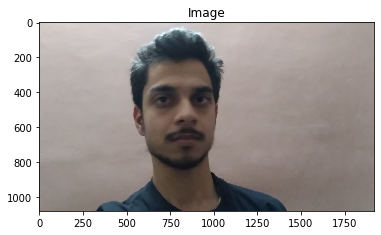

In [57]:
plt.imshow(im[:,:,::-1])
plt.title("Image")
plt.show()

In [0]:
points = fbc.getLandmarks(faceDetector, landmarkDetector, im)

In [0]:
points = np.array(points)

In [0]:
im = np.float32(im)/255.0

In [61]:
len(points)

5

In [0]:
# Dimensions of output image
h = 600
w = 600

In [0]:
imNorm, points = fbc.normalizeImagesAndLandmarks((h, w), im, points)

In [0]:
imNorm = np.uint8(imNorm*255)

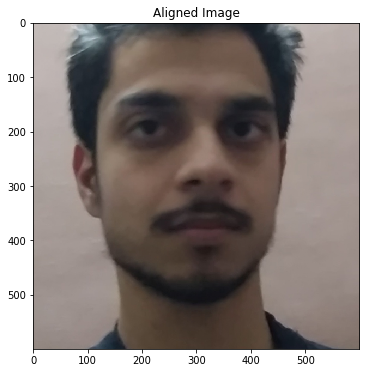

In [65]:
plt.imshow(imNorm[:,:,::-1])
plt.title("Aligned Image")
plt.show()

In [0]:
#align all frames
for frame in range(0,103):
   im = cv2.imread("frames/frame"+ str(frame)+ ".jpg")
   try:
      points = fbc.getLandmarks(faceDetector, landmarkDetector, im)
      points = np.array(points)
      im = np.float32(im)/255.0
      # Dimensions of output image
      h = 600
      w = 600
      imNorm, points = fbc.normalizeImagesAndLandmarks((h, w), im, points)
      imNorm = np.uint8(imNorm*255)
      cv2.imwrite("aligned_frames/frame"+ str(frame)+ ".jpg", imNorm)
   except:
      pass   

In [0]:
def convert_frames_to_video(pathIn,pathOut,fps):
    frame_array = []
    files = [f for f in os.listdir(pathIn) if isfile(join(pathIn, f))]
 
    #for sorting the file names properly
    files.sort(key = lambda x: int(x[5:-4]))
 
    for i in range(len(files)):
        filename=pathIn + files[i]
        #reading each files
        img = cv2.imread(filename)
        height, width, layers = img.shape
        size = (width,height)
        print(filename)
        #inserting the frames into an image array
        frame_array.append(img)
 
    out = cv2.VideoWriter(pathOut,cv2.VideoWriter_fourcc(*'DIVX'), fps, size)
 
    for i in range(len(frame_array)):
        # writing to a image array
        out.write(frame_array[i])
    out.release()

In [68]:
#convert the aligned frames to video
import os
from os.path import isfile, join
convert_frames_to_video('./aligned_frames/', './video_loc/aligned_video_chai.mp4', 15)

./aligned_frames/frame0.jpg
./aligned_frames/frame1.jpg
./aligned_frames/frame2.jpg
./aligned_frames/frame3.jpg
./aligned_frames/frame4.jpg
./aligned_frames/frame5.jpg
./aligned_frames/frame6.jpg
./aligned_frames/frame7.jpg
./aligned_frames/frame8.jpg
./aligned_frames/frame9.jpg
./aligned_frames/frame10.jpg
./aligned_frames/frame11.jpg
./aligned_frames/frame12.jpg
./aligned_frames/frame13.jpg
./aligned_frames/frame14.jpg
./aligned_frames/frame15.jpg
./aligned_frames/frame16.jpg
./aligned_frames/frame17.jpg
./aligned_frames/frame18.jpg
./aligned_frames/frame19.jpg
./aligned_frames/frame20.jpg
./aligned_frames/frame21.jpg
./aligned_frames/frame22.jpg
./aligned_frames/frame23.jpg
./aligned_frames/frame24.jpg
./aligned_frames/frame25.jpg
./aligned_frames/frame26.jpg
./aligned_frames/frame27.jpg
./aligned_frames/frame28.jpg
./aligned_frames/frame29.jpg
./aligned_frames/frame30.jpg
./aligned_frames/frame31.jpg
./aligned_frames/frame32.jpg
./aligned_frames/frame33.jpg
./aligned_frames/frame34

In [0]:
def detectFace(im):
  # Detect faces in the image
  faceRects = faceDetector(im, 0)
  #print("Number of faces detected: ",len(faceRects))

  return faceRects

In [0]:

def drawPolyline(im, landmarks, start, end, isClosed=False):
  points = []
  for i in range(start, end+1):
    point = [landmarks.part(i).x, landmarks.part(i).y]
    points.append(point)

  points = np.array(points, dtype=np.int32)
  cv2.polylines(im, [points], isClosed, (255, 200, 0), 
                  thickness=2, lineType=cv2.LINE_8)

In [0]:
# Use this function for 68-points facial landmark detector model
def renderFace(im, landmarks):
    assert(landmarks.num_parts == 68)
    drawPolyline(im, landmarks, 0, 16)           # Jaw line
    drawPolyline(im, landmarks, 17, 21)          # Left eyebrow
    drawPolyline(im, landmarks, 22, 26)          # Right eyebrow
    drawPolyline(im, landmarks, 27, 30)          # Nose bridge
    drawPolyline(im, landmarks, 30, 35, True)    # Lower nose
    drawPolyline(im, landmarks, 36, 41, True)    # Left eye
    drawPolyline(im, landmarks, 42, 47, True)    # Right Eye
    drawPolyline(im, landmarks, 48, 59, True)    # Outer lip
    drawPolyline(im, landmarks, 60, 67, True)    # Inner lip

In [0]:
# Use this function for any model other than
# 68 points facial_landmark detector model
def renderFace2(im, landmarks, color=(0, 255, 0), radius=3):
  for p in landmarks.parts():
    cv2.circle(im, (p.x, p.y), radius, color, -1)

In [0]:
def writeLandmarksToFile(landmarks, landmarksFileName):
  with open(landmarksFileName, 'w') as f:
    for p in landmarks.parts():
      f.write("%s %s\n" %(int(p.x),int(p.y)))

  f.close()

In [0]:
def drawLandmarks(frameNo, im, faceRects):

  # Loop over all detected face rectangles
  for i in range(0, len(faceRects)):
      newRect = dlib.rectangle(int(faceRects[i].left()),
                         int(faceRects[i].top()),
                         int(faceRects[i].right()),
                         int(faceRects[i].bottom()))
      # For every face rectangle, run landmarkDetector
      landmarks = landmarkDetector(im, newRect)
      # Print number of landmarks
      #if i==0:
        #print("Number of landmarks",len(landmarks.parts()))
      # Store landmarks for current face
      landmarksAll.append(landmarks)

      # Next, we render the outline of the face using
      # detected landmarks.
      renderFace(im, landmarks)

      # The code below saves the landmarks to 
      # output/frame_0 … output/frame_N.txt.
      landmarksFileName = landmarksBasename +"_"+ str(frameNo)+ ".txt"
      #print("Saving landmarks to", landmarksFileName)
      # Write landmarks to disk
      writeLandmarksToFile(landmarks, landmarksFileName)

In [0]:
# Save output frames
def saveFrames(im, filename):
  outputFileName = OUTPUTPATH + filename
  print("Saving output image to", outputFileName)
  cv2.imwrite(outputFileName, im)

In [76]:
!wget https://raw.githubusercontent.com/JeffTrain/selfie/master/shape_predictor_68_face_landmarks.dat

--2019-11-14 09:22:41--  https://raw.githubusercontent.com/JeffTrain/selfie/master/shape_predictor_68_face_landmarks.dat
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 99693937 (95M) [application/octet-stream]
Saving to: ‘shape_predictor_68_face_landmarks.dat.1’

shape_predictor_68_ 100%[===================>]  95.08M   167MB/s    in 0.6s    

2019-11-14 09:22:43 (167 MB/s) - ‘shape_predictor_68_face_landmarks.dat.1’ saved [99693937/99693937]



In [80]:
import os

srcframePrefix = "frame"
srcframeSuffix = ".jpg"
DATA_PATH = './aligned_frames/'
PREDICTOR_PATH = "/content/shape_predictor_68_face_landmarks.dat"
faceDetector = dlib.get_frontal_face_detector()
landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)
#landmarkDetector = dlib.shape_predictor(PREDICTOR_PATH)
landmarksBasename = 'landmark_path/' + "frame"
OUTPUTPATH = 'landmark_frames/'
for i in range(0,142):
  try:
    imgname = srcframePrefix + str(i) + srcframeSuffix
    imgfile = DATA_PATH + imgname
    #print("Showing image :%s" % imgfile)
    im = cv2.imread(imgfile)
    faceRects = detectFace(im)
  
    #print(faceRects)
    # List to store landmarks of all detected faces
    landmarksAll = []
    drawLandmarks(i, im, faceRects)
  
    saveFrames(im, imgname)
  except:
    pass

Saving output image to landmark_frames/frame0.jpg
Saving output image to landmark_frames/frame1.jpg
Saving output image to landmark_frames/frame2.jpg
Saving output image to landmark_frames/frame3.jpg
Saving output image to landmark_frames/frame4.jpg
Saving output image to landmark_frames/frame5.jpg
Saving output image to landmark_frames/frame6.jpg
Saving output image to landmark_frames/frame7.jpg
Saving output image to landmark_frames/frame8.jpg
Saving output image to landmark_frames/frame9.jpg
Saving output image to landmark_frames/frame10.jpg
Saving output image to landmark_frames/frame11.jpg
Saving output image to landmark_frames/frame12.jpg
Saving output image to landmark_frames/frame13.jpg
Saving output image to landmark_frames/frame14.jpg
Saving output image to landmark_frames/frame15.jpg
Saving output image to landmark_frames/frame16.jpg
Saving output image to landmark_frames/frame17.jpg
Saving output image to landmark_frames/frame18.jpg
Saving output image to landmark_frames/fr

In [78]:
!cp landmark_path/*.jpg landmark_frames/

cp: cannot stat 'landmark_path/*.jpg': No such file or directory


In [81]:
convert_frames_to_video('landmark_frames/','./final_out.mp4', 15)

landmark_frames/frame0.jpg
landmark_frames/frame1.jpg
landmark_frames/frame2.jpg
landmark_frames/frame3.jpg
landmark_frames/frame4.jpg
landmark_frames/frame5.jpg
landmark_frames/frame6.jpg
landmark_frames/frame7.jpg
landmark_frames/frame8.jpg
landmark_frames/frame9.jpg
landmark_frames/frame10.jpg
landmark_frames/frame11.jpg
landmark_frames/frame12.jpg
landmark_frames/frame13.jpg
landmark_frames/frame14.jpg
landmark_frames/frame15.jpg
landmark_frames/frame16.jpg
landmark_frames/frame17.jpg
landmark_frames/frame18.jpg
landmark_frames/frame19.jpg
landmark_frames/frame20.jpg
landmark_frames/frame21.jpg
landmark_frames/frame22.jpg
landmark_frames/frame23.jpg
landmark_frames/frame24.jpg
landmark_frames/frame25.jpg
landmark_frames/frame26.jpg
landmark_frames/frame27.jpg
landmark_frames/frame28.jpg
landmark_frames/frame29.jpg
landmark_frames/frame30.jpg
landmark_frames/frame31.jpg
landmark_frames/frame32.jpg
landmark_frames/frame33.jpg
landmark_frames/frame34.jpg
landmark_frames/frame35.jpg
la